In [1]:
import pandas as pd
import tarfile
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FOLDER = 'Data/'

MOVIE_DATASET = DATA_FOLDER+"MovieSummaries.tar.gz"

In [3]:
# Extract the .tar.gz archive
with tarfile.open(MOVIE_DATASET, 'r:gz') as tar:
    tar.extractall(path=DATA_FOLDER)

# Load the data into a DataFrame
file_path = DATA_FOLDER+"MovieSummaries"

In [4]:
print(file_path)

Data/MovieSummaries


In [5]:
CHARACTER_DATA_SET = file_path+"/character.metadata.tsv"
CharacterDF = pd.read_table(CHARACTER_DATA_SET)

#add headers
CharacterDF.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age_movie_release', 'Freebase_character/actor_map_ID', 'Freebase_character_ID', 'Freebase_actor_ID']

# Inspect and work with the DataFrame
CharacterDF.head() # Display the first few rows of the DataFrame


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [6]:
MOVIE_DATA_SET = file_path+"/movie.metadata.tsv"
MovieDF = pd.read_table(MOVIE_DATA_SET)
MovieDF.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name','Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres']


# Inspect and work with the DataFrame
MovieDF.head() # Display the first few rows of the DataFrame


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


**Some remarks on the data**
Movie release date not always formatted in the same way. 
Lots of NaN in box office revenue. 
Movie language formatted in a strange way. 


In [7]:
type(MovieDF['Movie_release_date'][1])

str

### Some ploting

### Genre representation

In [8]:
#import ast 
import json

In [9]:
import ast  # This library is used to safely evaluate the literal syntax tree of a string


# Convert the string representation of the dictionary to an actual dictionary
MovieDF['Movie_genres'] = MovieDF['Movie_genres'].apply(ast.literal_eval)
MovieDF['Movie_languages'] = MovieDF['Movie_languages'].apply(ast.literal_eval)
MovieDF['Movie_countries'] = MovieDF['Movie_countries'].apply(ast.literal_eval)

MovieDF['Movie_languages_list'] = MovieDF['Movie_languages'].apply(lambda x: list(x.values()))
MovieDF['Movie_countries_list'] = MovieDF['Movie_countries'].apply(lambda x: list(x.values()))

In [10]:
MovieDF

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_list,Movie_countries_list
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",[English Language],[United States of America]
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",[Norwegian Language],[Norway]
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",[English Language],[United Kingdom]
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},[German Language],[Germany]
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{'/m/06ppq': 'Silent film', '/m/02h40lc': 'Eng...",{'/m/09c7w0': 'United States of America'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen...","[Silent film, English Language]",[United States of America]
...,...,...,...,...,...,...,...,...,...,...,...
81735,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'},[English Language],[United States of America]
81736,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0...",[English Language],"[Ireland, United Kingdom]"
81737,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}",[English Language],[United States of America]
81738,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ...",[Japanese Language],[Japan]


In [24]:
import pandas as pd


# Create a new column for the list of genres
MovieDF['Movie_genres_list'] = MovieDF['Movie_genres'].apply(lambda x: list(x.values()))

# Flatten the list of genres
all_genres = [genre for sublist in MovieDF['Movie_genres_list'] for genre in sublist]

# Create a pandas Series from the flattened list
genre_counts = pd.Series(all_genres).value_counts()

genre_counts

Drama                   34007
Comedy                  16349
Romance Film            10234
Black-and-white          9094
Action                   8797
                        ...  
Neorealism                  1
Silhouette animation        1
Chick flick                 1
Statutory rape              1
Buddy Picture               1
Length: 363, dtype: int64

*It can be noted that there are 363 genres, including many that only have one related movie. Let's therefore look at the 20 first prominent genres.*

In [29]:
genre_counts.nlargest(30)

Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8797
Thriller             8743
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5279
Silent film          5250
Adventure            4962
Family Film          4598
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Romantic drama       3372
Mystery              3195
Science Fiction      3051
Fantasy              2820
Romantic comedy      2680
War film             2652
Japanese Movies      2322
Western              2226
Crime Thriller       2122
Period piece         1758
Comedy-drama         1720
dtype: int64

In [35]:
top30_genre = genre_counts.nlargest(30)

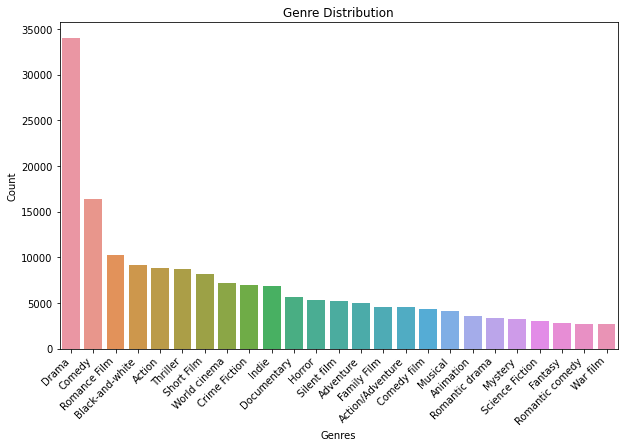

In [39]:
# Barchart
plt.figure(figsize=(10, 6))  
sns.barplot(x=top30_genre.index, y=top30_genre.values)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()


*remark: Comedy film = Comedy = Comdey-Drama ; ev. regroup them together*

Let's now look at the evolution in time of certain genre of interest. 
- SF : as it is one of the main genres excplicitly dealing with technology
- Fantasy: as new technologies permits better rendering and thus popularity of the genre
- Black and white & Silent Film: to look at the drop coming after the begining of color and sound
- War films

In [44]:
#We are only interested in the release date year

# Extract the year from each cell
MovieDF['Movie_release_date'] = MovieDF['Movie_release_date'].str.extract(r'(\d{4})')

# Convert the 'release_year' column to numeric values
MovieDF['Movie_release_date'] = pd.to_numeric(MovieDF['Movie_release_date'], errors='coerce')

In [45]:
MovieDF['Movie_release_date']

0        2000.0
1        1988.0
2        1987.0
3        1983.0
4        1913.0
          ...  
81735    2011.0
81736    2011.0
81737    1972.0
81738    1992.0
81739    2002.0
Name: Movie_release_date, Length: 81740, dtype: float64

In [57]:
MovieDF['Movie_genres_list']
pd.Series([genre for sublist in MovieDF['Movie_genres_list'] for genre in sublist]).value_counts().get('Science Fiction', 0)

3051

In [62]:
genre_stats_per_year = MovieDF.groupby(MovieDF['Movie_release_date']).apply(lambda x: pd.Series({
    'SF': pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Science Fiction', 0),
    'Fantasy': pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Fantasy', 0),
    'Black-and-white': pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Black-and-white', 0),
    'Silent film':pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Silent film', 0),
    'War film':pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('War film', 0)
}))

In [64]:
genre_stats_per_year

,SF,Fantasy,Black-and-white,Silent film,War film
Movie_release_date,,,,,
1010.0,0,0,0,0,0
1888.0,0,0,1,1,0
1889.0,0,0,1,1,0
1890.0,0,0,0,2,0
1891.0,0,0,0,1,0
...,...,...,...,...,...
2012.0,42,45,2,3,13
2013.0,23,13,0,0,2
2014.0,1,3,0,0,0


We notice one outliar released in 1010. We drop it to better visualize the years of interest. 

In [82]:
genre_stats_per_year = genre_stats_per_year.drop([1010])

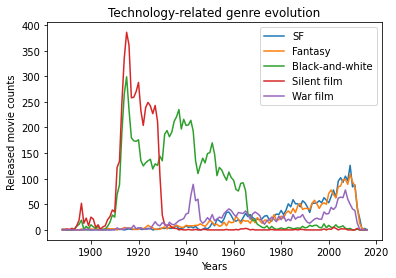

In [88]:
plt.plot(genre_stats_per_year.index, genre_stats_per_year.SF, label = 'SF')
plt.plot(genre_stats_per_year.index, genre_stats_per_year.Fantasy, label = 'Fantasy')
plt.plot(genre_stats_per_year.index, genre_stats_per_year['Black-and-white'], label = 'Black-and-white')
plt.plot(genre_stats_per_year.index, genre_stats_per_year['Silent film'], label = 'Silent film')
plt.plot(genre_stats_per_year.index, genre_stats_per_year['War film'], label = 'War film')


plt.xlabel("Years")
plt.ylabel("Released movie counts")
plt.title("Technology-related genre evolution")
plt.legend()
plt.show()

In [15]:
stats_by_gender= CharacterDF.groupby(CharacterDF['Actor_gender']).apply(lambda x: pd.Series({
    'average_height': x['Actor_height'].mean(), 'std_height': x['Actor_height'].std()
}))

#stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({'average_wg': x['worldwide_gross'].mean(), 'std_wg': x['worldwide_gross'].std()
   

In [16]:
stats_by_gender

,average_height,std_height
Actor_gender,,
F,1.659008,0.068705
M,1.863798,5.499429


In [ ]:
plt.boxplot(stats_by_gender['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

In [31]:
nb_men = CharacterDF[CharacterDF.Actor_gender == 'M'].shape[0]
nb_women = CharacterDF[CharacterDF.Actor_gender == 'F'].shape[0]
#CharacterDF.plot.pie(y='Actor gender')

In [33]:
print(nb_men,nb_women,CharacterDF.shape[0])
print(nb_women+nb_men)
#lot of missing data, or non-binary?

270257 134802 450668
405059


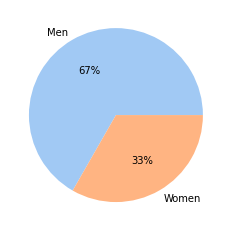

In [35]:
data = [nb_men,nb_women]
labels =['Men', 'Women']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Actor_height', ylabel='Actor_age_movie_release'>

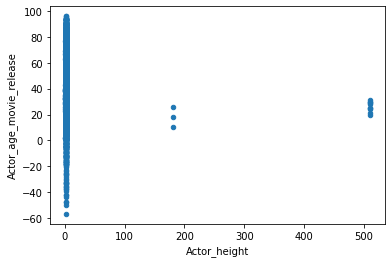

In [38]:
CharacterDF.plot(x= 'Actor_height', y= 'Actor_age_movie_release', kind = 'scatter')

<AxesSubplot:ylabel='Frequency'>

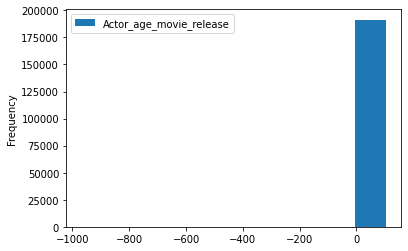

In [41]:
CharacterDF[CharacterDF.Actor_gender == 'M'].plot(y = 'Actor_age_movie_release',kind = 'hist')

### Add the tvtrope column

In [ ]:
import pandas as pd
import json

# Read the text file into a DataFrame
with open('your_text_file.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    parts = line.strip().split('\t')
    character = parts[0]
    info_dict = json.loads(parts[1])
    data.append({'character': character, **info_dict})

new_df = pd.DataFrame(data)

# Now, let's assume you have an existing DataFrame called 'existing_df'

# Merge the new DataFrame with the existing DataFrame using the 'character' column as the key
merged_df = pd.merge(existing_df, new_df, on='character', how='left')

# 'how' parameter specifies how you want to merge:
# - 'left' means you want to keep all rows from the 'existing_df' and add matching rows from 'new_df' if they exist.

# Print the resulting DataFrame
print(merged_df)
